# Decision Tree Regression
Decision tree is "non-parametric" machine learning model in contrast to linear or logistic regression which are parametric models

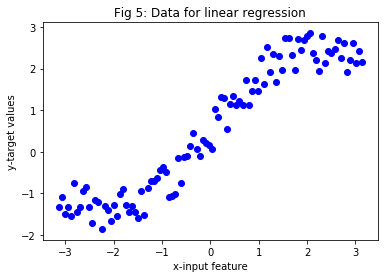

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='blue') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

## Splitting the data into training, validation and test sets

In [5]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

# Fit a line to the data
A decision tree learns a piece-wise linear fit to the data. We will use sklearn.tree.DecisionTreeRegressor.

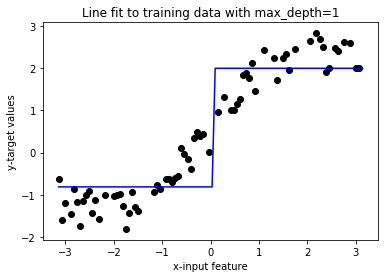

Training MSE:  0.336844889075 
Validation MSE:  0.572746575432 
Test MSE:  0.27309704093


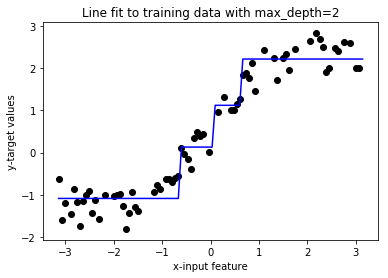

Training MSE:  0.106990032892 
Validation MSE:  0.181898812205 
Test MSE:  0.0847967645204


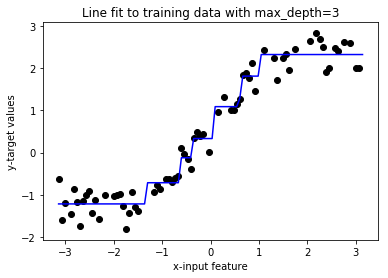

Training MSE:  0.0638515656082 
Validation MSE:  0.134585057945 
Test MSE:  0.153304854637


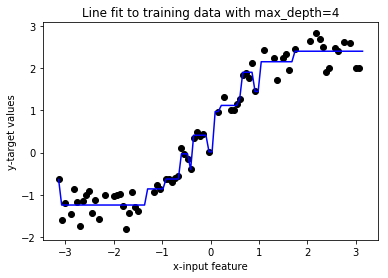

Training MSE:  0.0478738221592 
Validation MSE:  0.157476237151 
Test MSE:  0.163270491016


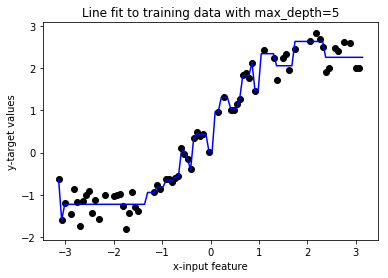

Training MSE:  0.0357938168361 
Validation MSE:  0.193626210556 
Test MSE:  0.20204759128


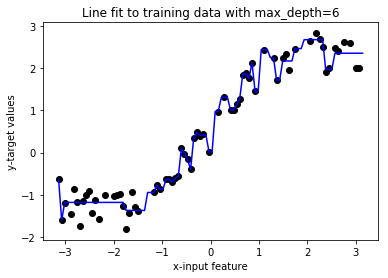

Training MSE:  0.0270685808093 
Validation MSE:  0.232277000177 
Test MSE:  0.249459760331


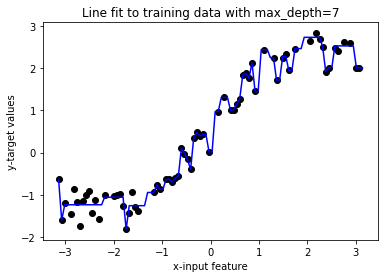

Training MSE:  0.0150636172516 
Validation MSE:  0.233467629853 
Test MSE:  0.26637984162


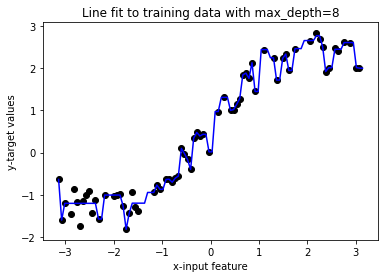

Training MSE:  0.0113773115876 
Validation MSE:  0.21418164698 
Test MSE:  0.264306684267


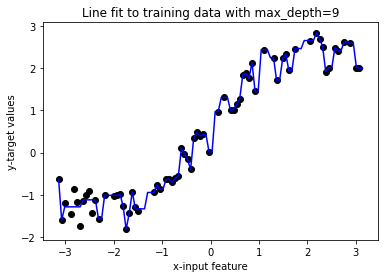

Training MSE:  0.00866026641934 
Validation MSE:  0.223149739268 
Test MSE:  0.264033213925


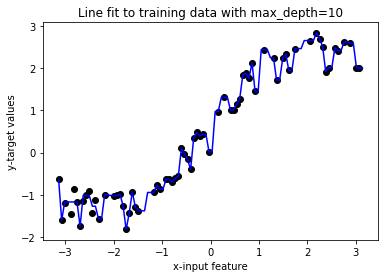

Training MSE:  0.00366017211109 
Validation MSE:  0.227931036028 
Test MSE:  0.265210494256


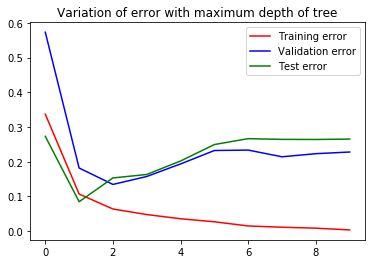

In [8]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    model = tree.DecisionTreeRegressor (max_depth =depth)
    
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()
